In [1]:
#-*- coding : utf-8-*-
# coding:unicode_escape
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv(r'D:\Crawler\51job\人力-1-clean.csv', encoding='gb18030')
data1=pd.read_csv(r'D:\Crawler\51job\人力-1-clean.csv', encoding='gb18030')   # 没有年薪的数据，后面只分析月薪

In [5]:
data=pd.DataFrame(data)
data1=pd.DataFrame(data1)

In [6]:
print(data.shape)
print(data1.shape)

(1000, 13)
(1000, 13)


## 数据条目

In [7]:
data.head()

,职位名称,薪酬,城市地区,工作经验要求,学历要求,公司福利,公司名称,规模类型,公司标签,地区,薪酬_n,月薪最小值,月薪最大值
0,人力资源管理岗,1-2万,南昌·青山湖区,5-7年,硕士,节假日福利\n五险一金,赣江新区创新产业投资有限公司,民营 | 50-150人,金融/投资/证券,南昌,10000-20000,10000.0,20000.0
1,人力资源管理岗,8千-1.6万·13薪,芜湖·鸠江区,5-7年,大专,五险一金\n员工旅游\n定期体检\n周末双休\n免费工作餐\n高温补贴,芜湖麦可威电磁科技有限公司,民营 | 150-500人,电子技术/半导体/集成电路,芜湖,8000-16000,8000.0,16000.0
2,人力资源管理岗,8千-1.5万,北京,5-7年,本科,招聘\n人才梯队\n职称评审\n人才管理体系\n五险一金\n补充医疗保险\n交通补贴\n餐饮...,中国核工业中原建设有限公司华东分公司,国企 | 150-500人,建筑/建材/工程,北京,8000-15000,8000.0,15000.0
3,企业人力资源管理培训师,9千-1.8万,东莞·南城区,3-4年,本科,五险一金\n员工旅游\n通讯补贴\n专业培训\n绩效奖金\n年终奖金\n定期体检\n弹性工作,广东向上人力资源有限公司,民营 | 50-150人,专业服务(咨询、人力资源、财会),东莞,9000-18000,9000.0,18000.0
4,人力资源管理,5-9千·13薪,扬州,3-4年,本科,五险一金\n专业培训\n股票期权\n年终奖金\n周末双休,江苏奥力威传感高科股份有限公司,已上市 | 500-1000人,汽车,扬州,5000-9000,5000.0,9000.0


## 职位名称&公司 数量

In [8]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
print(data.职位名称.value_counts().head(10))
print('-----------------------------------------------------------------------------------')
print(data.公司名称.value_counts().head())

人力资源专员         114
人力资源经理          92
人力资源主管          92
人力资源总监          61
人力资源管理          47
人力资源管理岗         14
人力资源助理          14
高薪人力资源主管-直聘     12
人力资源部经理         12
人力资源HRBP        11
Name: 职位名称, dtype: int64
-----------------------------------------------------------------------------------
云南州驰企业管理有限公司      12
浙江交投矿业有限公司        12
南通诺泰生物医药技术有限公司    10
上海嘉益装潢工程有限公司       9
北京王致和食品有限公司        8
Name: 公司名称, dtype: int64


In [9]:
data['工作经验要求'].value_counts()

3-4年     261
5-7年     254
2年       186
1年       146
无需经验      63
10年以上     53
8-9年      37
Name: 工作经验要求, dtype: int64

In [10]:
data['学历要求'].value_counts()  # 有异常值，写报告的时候删掉就行

本科       633
大专       320
硕士        31
中技/中专      8
高中         6
初中及以下      2
Name: 学历要求, dtype: int64

In [11]:
data['地区']=data['城市地区'].str[:2]

In [12]:
data['地区'].value_counts()

上海    111
深圳    100
广州     95
成都     53
昆明     38
     ... 
泸州      1
佳木      1
义乌      1
镇江      1
商丘      1
Name: 地区, Length: 125, dtype: int64

In [13]:
data['薪酬'].value_counts()

1-1.5万        62
6-8千          51
8千-1.2万       31
6千-1万         30
5-7千          29
              ..
5-7.5千         1
1.1-2万         1
5.5千-1万        1
2.5-4万·24薪     1
6-9千·14薪       1
Name: 薪酬, Length: 236, dtype: int64

In [14]:
data['薪酬_n'].value_counts()

10000-15000    73
6000-8000      62
8000-15000     40
8000-12000     39
8000-10000     39
               ..
2000-4000       1
20000-24000     1
3200-4200       1
13000-17000     1
18000-35000     1
Name: 薪酬_n, Length: 152, dtype: int64

<AxesSubplot: >

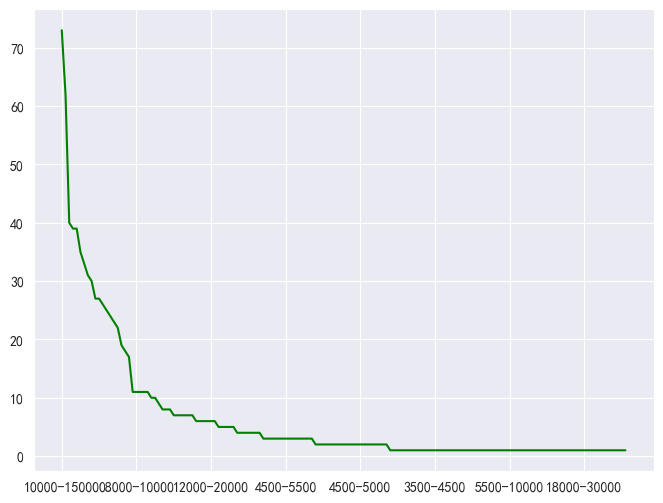

In [15]:
import matplotlib as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
data['薪酬_n'].value_counts().plot(kind='line', color='green',figsize=(8,6))


In [16]:
data['*n薪'].value_counts().sort_index()

KeyError: '*n薪'

In [17]:

a = data1.groupby('工作经验要求')['月薪最小值'].mean()
a = round(a, 2)
a

工作经验要求
10年以上    19075.47
1年        5776.71
2年        6722.83
3-4年      8238.31
5-7年     11149.61
8-9年     13394.59
无需经验      5825.00
Name: 月薪最小值, dtype: float64

这部分数据有点子奇怪

In [18]:
c = data1.groupby('工作经验要求')['月薪最大值'].max()
c = round(c, 2)
c

工作经验要求
10年以上    60000.0
1年       30000.0
2年       30000.0
3-4年     70000.0
5-7年     65000.0
8-9年     40000.0
无需经验     16000.0
Name: 月薪最大值, dtype: float64

In [19]:
b = data1.groupby('工作经验要求')['月薪最大值'].mean()
b = round(b, 2)
b

工作经验要求
10年以上    29603.77
1年        8583.56
2年       10321.74
3-4年     12603.45
5-7年     17106.69
8-9年     20108.11
无需经验      8745.00
Name: 月薪最大值, dtype: float64

In [20]:
经验1年 = list(data1[data1['工作经验要求']=='1年']['月薪最小值'])
经验2年 = data1[data1['工作经验要求']=='2年']['月薪最小值']
经验3到4年 = data1[data1['工作经验要求']=='3-4年']['月薪最小值']
经验5到7年 = data1[data1['工作经验要求']=='5-7年']['月薪最小值']
经验8到9年 = data1[data1['工作经验要求']=='8-9年']['月薪最小值']
无需经验 = data1[data1['工作经验要求']=='无需经验']['月薪最小值']

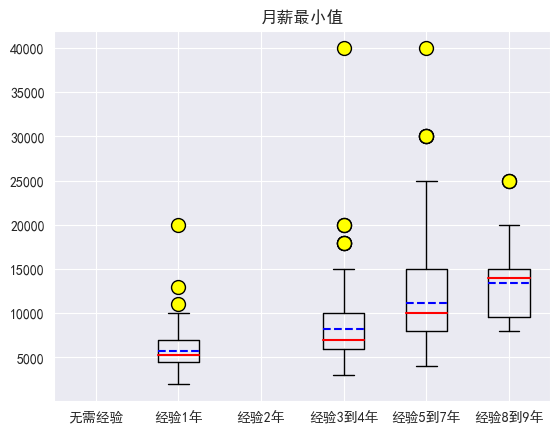

In [21]:
import matplotlib.pyplot as plt
plt.boxplot((无需经验,经验1年,
经验2年,
经验3到4年,
经验5到7年,
经验8到9年,

             ),labels=(
    '无需经验',
    '经验1年',
    '经验2年',
    '经验3到4年',
    '经验5到7年',
    '经验8到9年',

),
    medianprops={'color': 'red', 'linewidth': '1.5'},
    meanline=True,
    showmeans=True,
    meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    flierprops={"marker": "o", "markerfacecolor": "yellow", "markersize": 10},
            )
plt.title('月薪最小值')
plt.grid(visible=True)
plt.show()

In [26]:
z = data1.groupby('工作经验要求')['月薪最小值']
z.head()

0       3000
1       5000
2       3500
3      10000
4       3000
5       7000
6       5000
7       6000
8       3000
9       6000
10     10000
11     20000
12      6500
13     12000
14      4500
15      7000
16      6500
17      5000
18      7000
19      8000
21      8000
22     30000
25      5000
26      8000
27      4000
36     35000
37     10000
46     15000
60     20000
61     12000
132    20000
172     8000
175     8000
234    18000
268    15000
Name: 月薪最小值, dtype: int64

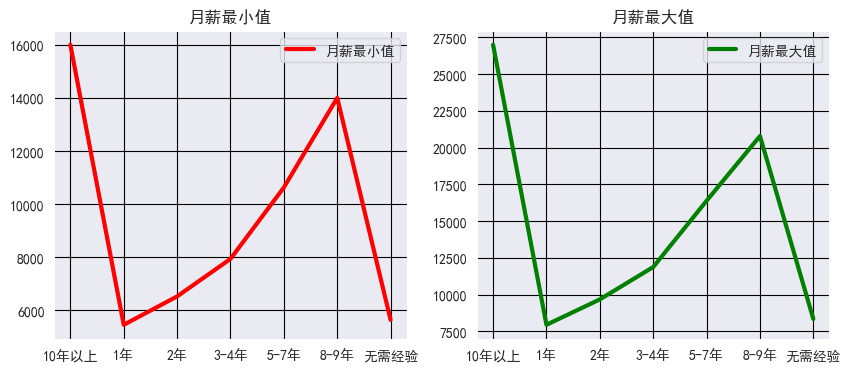

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#通过对象绘图
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
x=a.index

#绘制第一幅图
Y1=a
ax1.plot(x,Y1,label='月薪最小值', color='r',linewidth=3)
ax1.legend(loc="best")
ax1.grid(color='k')
ax1.set_title("月薪最小值")

#绘制第二幅图
Y2=b
ax2.plot(x,Y2,label='月薪最大值', color='green',linewidth=3)
ax2.legend(loc="best")
ax2.set_title("月薪最大值")
# ax2.set_xlabel("X")
# ax2.set_ylabel("Y")
ax2.grid(color='k')

plt.show()

In [69]:
a = data1.groupby('工作经验要求')['月薪最小值'].max()
round(a, 2)

工作经验要求
10年以上经验    60000.0
1年经验       20000.0
2年经验       20000.0
3-4年经验     26000.0
5-7年经验     30000.0
8-9年经验     40000.0
无需经验       25000.0
Name: 月薪最小值, dtype: float64

In [28]:
b = data1.groupby('工作经验要求')['月薪最大值'].max()
round(b, 2)

工作经验要求
10年以上    55000
1年       20000
2年       30000
3-4年     40000
5-7年     40000
8-9年     50000
无需经验     15000
Name: 月薪最大值, dtype: int64

In [29]:
c = data.groupby(["地区","月薪最小值"]).groups

In [22]:
e = data['规模类型'].str[-12:]
e

0        |  50-150人
1       |  150-500人
2       |  150-500人
3        |  50-150人
4      |  500-1000人
           ...     
995      1000-5000人
996     |  10000人以上
997     |  150-500人
998      |  50-150人
999      1000-5000人
Name: 规模类型, Length: 1000, dtype: object

In [23]:
公司规模 = []
for i in e:
    i = i.strip()
    i = i.strip('|')
    i = i.strip()
    i = i.strip('民营')
    i = i.strip('美）')
    i = i.strip('国企')
    i = i.strip('公司')
    i = i.strip('外资（欧美）')
    i = i.strip('合资')
    i = i.strip()
    i = i.strip('|')
    i = i.strip()
    print(i)
    公司规模.append(i)
    # print(公司类型)

50-150人
150-500人
150-500人
50-150人
500-1000人
150-500人
10000人以上
1000-5000人
5000-10000人
150-500人
150-500人
150-500人
50-150人
150-500人
150-500人
500-1000人
50-150人
500-1000人
5000-10000人
500-1000人
1000-5000人
少于50人
500-1000人
1000-5000人
1000-5000人
150-500人
500-1000人
50-150人
少于50人
150-500人
150-500人
1000-5000人
1000-5000人
50-150人
150-500人
少于50人
50-150人
150-500人
10000人以上
1000-5000人
少于50人
150-500人
150-500人
10000人以上
500-1000人
50-150人
500-1000人
50-150人
少于50人
150-500人
1000-5000人
500-1000人
150-500人
500-1000人
1000-5000人
50-150人
500-1000人
1000-5000人
500-1000人
500-1000人
500-1000人

1000-5000人
500-1000人
50-150人
500-1000人
1000-5000人
少于50人
150-500人
500-1000人

150-500人
1000-5000人
1000-5000人
1000-5000人

1000-5000人
150-500人
150-500人
150-500人
50-150人
500-1000人
500-1000人
50-150人
1000-5000人
150-500人


150-500人
500-1000人
1000-5000人
1000-5000人
5000-10000人
少于50人
50-150人
50-150人
500-1000人
150-500人
150-500人
1000-5000人
150-500人
50-150人
150-500人
50-150人
50-150人
10000人以上
50-150人
1000-5000人
500-1000人
150-500人
150-500人
50-150人


In [24]:
公司规模 = pd.DataFrame(公司规模)
data['公司规模'] = 公司规模

In [25]:
d = data['规模类型'].str[:7]
d

0      民营  |  
1      民营  |  
2      国企  |  
3      民营  |  
4      已上市  | 
        ...   
995    外资（非欧美）
996    民营  |  
997    民营  |  
998    民营  |  
999    合资  |  
Name: 规模类型, Length: 1000, dtype: object

In [26]:
公司类型 = []
for i in d:
    i = i.strip()
    i = i.strip('|')
    i = i.strip()
    print(i)
    公司类型.append(i)
    # print(公司类型)

民营
民营
国企
民营
已上市
国企
已上市
事业单位
国企
国企
民营
国企
民营
国企
国企
民营
民营
国企
国企
民营
事业单位
外资（非欧美）
国企
国企
民营
民营
已上市
国企
合资
合资
民营
民营
国企
民营
民营
民营
民营
民营
已上市
合资
民营
民营
民营
外资（非欧美）
合资
民营
国企
外资（欧美）
民营
国企
民营
民营
国企
民营
民营
民营
民营
民营
国企
民营
民营
民营
民营
民营
民营
民营
民营
国企
民营
民营
民营
民营
民营
民营
国企
合资
民营
民营
民营
民营
民营
合资
民营
国企
民营
国企
外资（欧美）
民营
国企
已上市
国企
民营
国企
民营
民营
民营
非营利组织
国企
合资
民营
民营
民营
民营
国企
民营
民营
民营
民营
民营
创业公司
民营
民营
已上市
民营
民营
已上市
民营
民营
民营
国企
民营
民营
民营
民营
国企
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
合资
民营
外资（非欧美）
民营
民营
民营
合资
已上市
民营
民营
已上市
民营
事业单位
民营
事业单位
合资
民营
民营
民营
民营
民营
民营
已上市
民营
民营
已上市
民营
合资
民营
民营
国企
民营
民营
民营
民营
民营
民营
合资
民营
外资（欧美）
国企
民营
民营
民营
已上市
民营
民营
外资（非欧美）
民营
民营
事业单位
已上市
民营
民营
民营
民营
国企
民营
民营
民营
民营
民营
民营
国企
民营
合资
已上市
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
外资（非欧美）
民营
外资（非欧美）
民营
民营
民营
民营
民营
民营
国企
民营
已上市
民营
民营
民营
民营
民营
已上市
国企
民营
民营
已上市
民营
已上市
民营
民营
民营
民营
民营
民营
民营
民营
民营
已上市
民营
民营
国企
民营
民营
国企
民营
民营
民营
民营
民营
民营
民营
民营
已上市
民营
已上市
民营
民营
民营
民营
民营
民营
民营
外资（非欧美）
民营
民营
民营
国企
民营
民营
国企
民营
民营
已上市
民营
民营
民营
民营
民营
外资（欧美）
外资（非欧美）
民营
已上市
民营
民营
民营
民营
民营
民营
国企


In [27]:
公司类型 = pd.DataFrame(公司类型)

In [28]:
data['公司类型'] = 公司类型

In [29]:
data.head()

,职位名称,薪酬,城市地区,工作经验要求,学历要求,公司福利,公司名称,规模类型,公司标签,地区,薪酬_n,月薪最小值,月薪最大值,公司规模,公司类型
0,人力资源管理岗,1-2万,南昌·青山湖区,5-7年,硕士,节假日福利\n五险一金,赣江新区创新产业投资有限公司,民营 | 50-150人,金融/投资/证券,南昌,10000-20000,10000.0,20000.0,50-150人,民营
1,人力资源管理岗,8千-1.6万·13薪,芜湖·鸠江区,5-7年,大专,五险一金\n员工旅游\n定期体检\n周末双休\n免费工作餐\n高温补贴,芜湖麦可威电磁科技有限公司,民营 | 150-500人,电子技术/半导体/集成电路,芜湖,8000-16000,8000.0,16000.0,150-500人,民营
2,人力资源管理岗,8千-1.5万,北京,5-7年,本科,招聘\n人才梯队\n职称评审\n人才管理体系\n五险一金\n补充医疗保险\n交通补贴\n餐饮...,中国核工业中原建设有限公司华东分公司,国企 | 150-500人,建筑/建材/工程,北京,8000-15000,8000.0,15000.0,150-500人,国企
3,企业人力资源管理培训师,9千-1.8万,东莞·南城区,3-4年,本科,五险一金\n员工旅游\n通讯补贴\n专业培训\n绩效奖金\n年终奖金\n定期体检\n弹性工作,广东向上人力资源有限公司,民营 | 50-150人,专业服务(咨询、人力资源、财会),东莞,9000-18000,9000.0,18000.0,50-150人,民营
4,人力资源管理,5-9千·13薪,扬州,3-4年,本科,五险一金\n专业培训\n股票期权\n年终奖金\n周末双休,江苏奥力威传感高科股份有限公司,已上市 | 500-1000人,汽车,扬州,5000-9000,5000.0,9000.0,500-1000人,已上市


In [31]:
fd = pd.DataFrame(data)
fd.to_csv('人力-1-clean.csv',header = True,index=0)

In [39]:
pd.DataFrame(data.groupby('地区')['公司规模'].value_counts()).rename_axis(["行政区", "公司规模"])

公司规模
行政区 公司规模            
三亚  少于50人          1
上海  50-150人       35
    150-500人      28
    少于50人         10
    500-1000人      9
...              ...
青岛  少于50人          2
    150-500人       1
    50-150人        1
马鞍  50-150人        1
鹰潭  1000-5000人     1

[247 rows x 1 columns]

In [40]:
data.groupby('工作经验要求')['月薪最小值'].value_counts()

工作经验要求  月薪最小值
10年以上   10000    2
        15000    2
        18000    1
        20000    1
        35000    1
                ..
无需经验    4200     1
        7000     1
        70000    1
        8300     1
        8500     1
Name: 月薪最小值, Length: 113, dtype: int64

In [41]:
data.groupby("地区", sort=False)["公司名称"].apply(lambda x: x.str.contains("信息科技").sum())

地区
孝感    0
南通    0
兰州    1
芜湖    0
南昌    0
     ..
滁州    0
株洲    0
温州    0
银川    0
邵阳    0
Name: 公司名称, Length: 96, dtype: int64

In [42]:
data[data['公司名称'].str.contains("信息技术")]

,职位名称,薪酬,城市地区,工作经验要求,学历要求,公司福利,公司名称,规模类型,公司标签,地区,*n薪,最低年薪,最高年薪,薪酬_n,月薪最小值,月薪最大值,公司规模,公司类型
112,招聘护工管理人员（拱墅区）,7-9千,杭州·拱墅区,2年,高中,派单\n养老机构\n护工\n重症\n护工管理\n培训\n医疗机构\n招聘\n护士长\n康复,宁波舒心康护信息技术有限公司,民营 | 150-500人,医疗/护理/卫生,杭州,NaN,NaN,NaN,7000-9000,7000,9000.0,150-500人,民营


In [89]:
data.groupby({'地区':'district','月薪最小值':'最小值','月薪最大值':'最大值'}, axis=1).sum()

,district,最大值,最小值
0,北京,35000.0,25000
1,青岛,20000.0,15000
2,长沙,20000.0,10000
3,深圳,15000.0,8000
4,苏州,15000.0,10000
...,...,...,...
663,广州,16000.0,12000
664,上海,13000.0,10000
665,苏州,6000.0,4500
666,上海,10000.0,8000


In [90]:
data1['地区'] = data['地区']
data1

,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,规模类型,地区,*n薪,最低年薪,最高年薪,薪酬_n,月薪最小值,月薪最大值
0,供应链总监,北京农顺物流管理科技有限公司,2.5-3.5万,北京-丰台区,本科,8-9年经验,五险一金,交通/运输/物流,农批行业类型供应链工作经验，主要为冷库/冷链物流园区供销服务。,民营 | 少于50人,北京,NaN,NaN,NaN,25000-35000,25000.0,35000.0
1,供应链主管/专员,迪卡侬上海生产采购中心,1.5-2万,青岛,本科,3-4年经验,五险一金,服装/纺织/皮革,30%基本日常工作：?负责运动产品的注塑类产品、油压类产品的生产供应链相关工作，如泳帽、蛙鞋...,外资（欧美） | 150-500人,青岛,NaN,NaN,NaN,15000-20000,15000.0,20000.0
2,供应链经理,长沙艾高信息科技有限公司,1-2万,长沙-岳麓区,本科,2年经验,五险,计算机软件,职位描述1、供应链专业咨询顾问。为公司供应链产品提供专业咨询顾问工作，完善供应商的开发，维护...,民营 | 少于50人,长沙,NaN,NaN,NaN,10000-20000,10000.0,20000.0
3,供应链主管,华伟达餐饮控股（深圳）有限公司,8千-1.5万,深圳-福田区,大专,3-4年经验,专业培训,餐饮业,工作职责：1、负责供应链的管理/统筹（仓库、物料…）2、不定时回访，解决加盟商问题，负责协调...,民营 | 150-500人,深圳,NaN,NaN,NaN,8000-15000,8000.0,15000.0
4,业务经理（物流以及供应链管理方向,佑仁电子科技（苏州）有限公司,1-1.5万,苏州-工业园区,本科,5-7年经验,餐饮补贴,计算机服务(系统、数据服务、维修),1.物流以及供应链管理，经济管理或相关专业***统招本科以上学历（含本科）2.5年以上供应链...,外资（非欧美） | 150-500人,苏州,NaN,NaN,NaN,10000-15000,10000.0,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,供应链财务分析助理经理5344,健合（中国）有限公司,1.2-1.6万·13薪,广州,本科,5-7年经验,交通补贴,快速消费品(食品、饮料、化妆品),岗位职责:KeyResponsibilities1.Performfinancialmont...,外资（非欧美） | 1000-5000人,上海,13.0,NaN,NaN,12000-16000,12000.0,16000.0
611,供应链计划专员,贝司克材料科技（上海）有限公司,1-1.3万,上海-黄浦区,本科,5-7年经验,五险一金,电子技术/半导体/集成电路,Main？Position？Tasks:To？coordinate/work？with？de...,民营 | 150-500人,佛山,NaN,NaN,NaN,10000-13000,10000.0,13000.0
612,供应链服务专员,西门子（中国）有限公司 全球共享服务中心(GSS),4.5-6千,苏州,本科,1年经验,五险一金,金融/投资/证券,供应链服务专员–苏州JobFamily:SCM-Procurement/SupplyChai...,外资（欧美）,上海,NaN,NaN,NaN,4500-6000,4500.0,6000.0
613,Supply Chain officer供应链专员,圣戈班（中国）投资有限公司,8千-1万·13薪,上海-闵行区,本科,2年经验,五险一金,机械/设备/重工,1、ResponsibleforconfirmingandvalidatingBUpurch...,外资（欧美） | 5000-10000人,上海,13.0,NaN,NaN,8000-10000,8000.0,10000.0


In [91]:
y = data1.groupby('地区')['月薪最小值'].mean()
y

地区
上海    12261.904762
上饶    14000.000000
东莞    15153.846154
中山    13166.666667
丽水    16000.000000
          ...     
金华     6000.000000
镇江     6000.000000
长沙    13625.000000
阳江    14000.000000
青岛    14000.000000
Name: 月薪最小值, Length: 66, dtype: float64

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

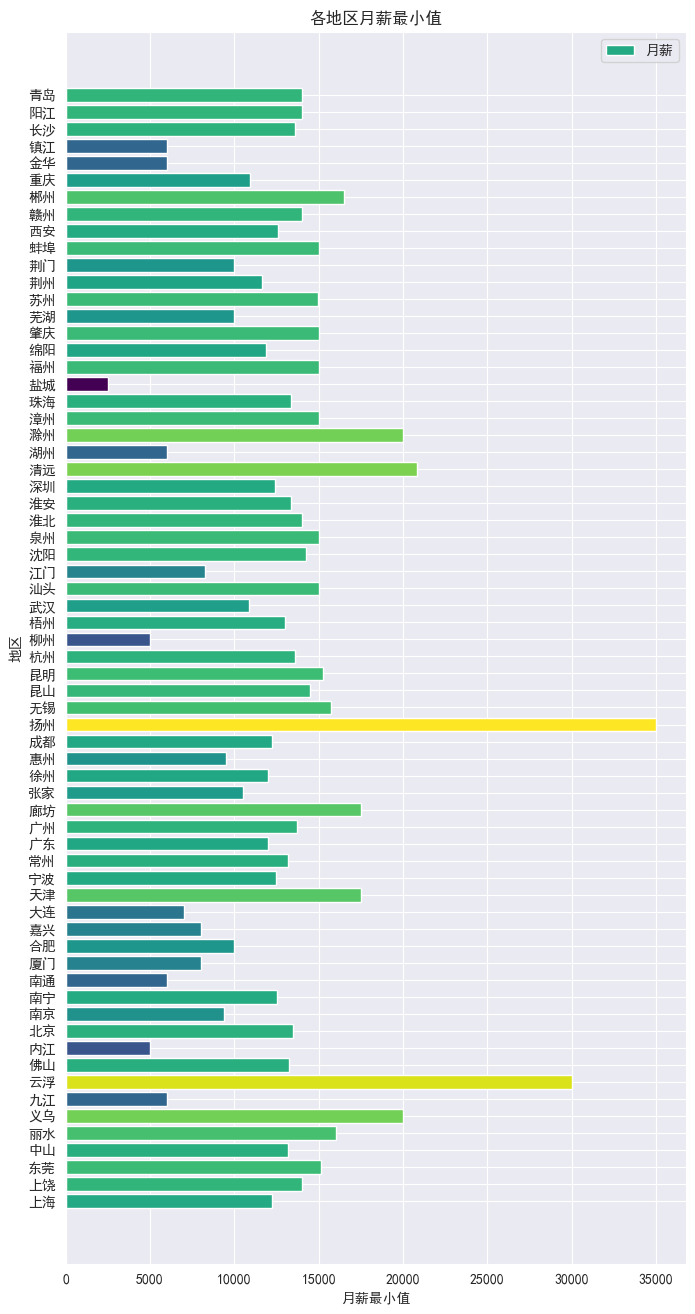

In [95]:
from matplotlib import colors
import matplotlib.cm as cm

norm1 = colors.LogNorm()
fig = plt.figure(figsize = (8,16))
plt.barh(y.index, y, label='月薪', color=cm.ScalarMappable(norm1, 'viridis').to_rgba(y))
plt.legend()
plt.title("各地区月薪最小值")
plt.xlabel("月薪最小值")
plt.ylabel("地区")
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=y.min(), vmax=y.max()))
plt.colorbar(sm)

for a, b in zip(y.index, y):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=11)


plt.show()


In [96]:
pd.DataFrame(data1['月薪最小值'].groupby([data1['地区'], data1['工作经验要求']]).mean())

月薪最小值
地区 工作经验要求               
上海 10年以上经验  22500.000000
   1年经验      6192.307692
   2年经验      8500.000000
   3-4年经验   11433.333333
   5-7年经验   13276.315789
...                  ...
长沙 5-7年经验   10250.000000
阳江 5-7年经验   13000.000000
   8-9年经验   15000.000000
青岛 2年经验     13000.000000
   3-4年经验   15000.000000

[185 rows x 1 columns]

In [97]:
data1['该区平均工资'] = data1[['地区','月薪最小值']].groupby(by='地区').transform('mean')
data1

,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,规模类型,地区,*n薪,最低年薪,最高年薪,薪酬_n,月薪最小值,月薪最大值,该区平均工资
0,供应链总监,北京农顺物流管理科技有限公司,2.5-3.5万,北京-丰台区,本科,8-9年经验,五险一金,交通/运输/物流,农批行业类型供应链工作经验，主要为冷库/冷链物流园区供销服务。,民营 | 少于50人,北京,NaN,NaN,NaN,25000-35000,25000.0,35000.0,13475.000000
1,供应链主管/专员,迪卡侬上海生产采购中心,1.5-2万,青岛,本科,3-4年经验,五险一金,服装/纺织/皮革,30%基本日常工作：?负责运动产品的注塑类产品、油压类产品的生产供应链相关工作，如泳帽、蛙鞋...,外资（欧美） | 150-500人,青岛,NaN,NaN,NaN,15000-20000,15000.0,20000.0,14000.000000
2,供应链经理,长沙艾高信息科技有限公司,1-2万,长沙-岳麓区,本科,2年经验,五险,计算机软件,职位描述1、供应链专业咨询顾问。为公司供应链产品提供专业咨询顾问工作，完善供应商的开发，维护...,民营 | 少于50人,长沙,NaN,NaN,NaN,10000-20000,10000.0,20000.0,13625.000000
3,供应链主管,华伟达餐饮控股（深圳）有限公司,8千-1.5万,深圳-福田区,大专,3-4年经验,专业培训,餐饮业,工作职责：1、负责供应链的管理/统筹（仓库、物料…）2、不定时回访，解决加盟商问题，负责协调...,民营 | 150-500人,深圳,NaN,NaN,NaN,8000-15000,8000.0,15000.0,12424.657534
4,业务经理（物流以及供应链管理方向,佑仁电子科技（苏州）有限公司,1-1.5万,苏州-工业园区,本科,5-7年经验,餐饮补贴,计算机服务(系统、数据服务、维修),1.物流以及供应链管理，经济管理或相关专业***统招本科以上学历（含本科）2.5年以上供应链...,外资（非欧美） | 150-500人,苏州,NaN,NaN,NaN,10000-15000,10000.0,15000.0,14939.393939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,供应链财务分析助理经理5344,健合（中国）有限公司,1.2-1.6万·13薪,广州,本科,5-7年经验,交通补贴,快速消费品(食品、饮料、化妆品),岗位职责:KeyResponsibilities1.Performfinancialmont...,外资（非欧美） | 1000-5000人,上海,13.0,NaN,NaN,12000-16000,12000.0,16000.0,12261.904762
611,供应链计划专员,贝司克材料科技（上海）有限公司,1-1.3万,上海-黄浦区,本科,5-7年经验,五险一金,电子技术/半导体/集成电路,Main？Position？Tasks:To？coordinate/work？with？de...,民营 | 150-500人,佛山,NaN,NaN,NaN,10000-13000,10000.0,13000.0,13230.769231
612,供应链服务专员,西门子（中国）有限公司 全球共享服务中心(GSS),4.5-6千,苏州,本科,1年经验,五险一金,金融/投资/证券,供应链服务专员–苏州JobFamily:SCM-Procurement/SupplyChai...,外资（欧美）,上海,NaN,NaN,NaN,4500-6000,4500.0,6000.0,12261.904762
613,Supply Chain officer供应链专员,圣戈班（中国）投资有限公司,8千-1万·13薪,上海-闵行区,本科,2年经验,五险一金,机械/设备/重工,1、ResponsibleforconfirmingandvalidatingBUpurch...,外资（欧美） | 5000-10000人,上海,13.0,NaN,NaN,8000-10000,8000.0,10000.0,12261.904762


In [98]:
data1.groupby('地区').filter(lambda x: x['月薪最小值'].mean() < 10000)

,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,规模类型,地区,*n薪,最低年薪,最高年薪,薪酬_n,月薪最小值,月薪最大值,该区平均工资
87,供应链采购经理,深圳市大甲共创餐饮有限责任公司,1-1.5万,深圳-龙岗区,大专,5-7年经验,通讯补贴,餐饮业,【岗位职责】1.做好总部计划和各个区域物流，营运之间的沟通，确保新品上市，老品下市的有序进行...,民营 | 150-500人,南京,NaN,NaN,NaN,10000-15000,10000.0,15000.0,9375.0
110,供应链经理,圣戈班速造建筑科技（成都）有限公司,1-1.5万,成都-青羊区,大专,5-7年经验,供应链,机械/设备/重工,岗位职责：1、全面负责供应链部采购、订单、仓储、物流各条线之间相互协作运转；2、设计并改善公...,外资（欧美）,嘉兴,NaN,NaN,NaN,10000-15000,10000.0,15000.0,8000.0
228,采购供应链主管,北京神州泰岳软件股份有限公司,1-2万,北京-朝阳区,本科,5-7年经验,五险一金,计算机软件,主要职责：1、负责公司能源柜等产品的采购，根据公司业务目标制定销售策略和实施计划，确保公司业...,已上市 | 1000-5000人,南京,NaN,NaN,NaN,10000-20000,10000.0,20000.0,9375.0
251,供应链经理,国药器械辽宁医疗科技有限公司,6-8千,北京-朝阳区,本科,5-7年经验,绩效奖金,医疗设备/器械,主要职责：1、负责公司能源柜等产品的采购，根据公司业务目标制定销售策略和实施计划，确保公司业...,国企 | 50-150人,嘉兴,NaN,NaN,NaN,6000-8000,6000.0,8000.0,8000.0
299,供应链主管,普恩富特（上海）环境科技有限公司,1.5-1.7万,上海-宝山区,本科,5-7年经验,五险一金,环保,1、全面负责公司供应链团队（计划、采购、仓储模块）的建设和管理工作，参与制定公司发展战略与年...,外资（欧美） | 150-500人,南京,NaN,NaN,NaN,15000-17000,15000.0,17000.0,9375.0
333,日语新项目-日语供应链,嘉信商务管理咨询（大连）有限公司,6-8千,大连,本科,1年经验,嘉信商务管理咨询（大连）有限公司,计算机软件,工作职责描述负责供应链管理职能的整体战略和执行，以及业务活动和运营的规划...协助物流流程进...,民营,九江,NaN,NaN,NaN,6000-8000,6000.0,8000.0,6000.0
357,供应链可持续性分析师,意大利赛达股份有限公司杭州代表处,6千-1万,杭州-西湖区,大专,2年经验,可持续分析师,贸易/进出口,WearelookingforaSupplyChainSustainabilityAnaly...,外资（欧美） | 少于50人,南通,NaN,NaN,NaN,6000-10000,6000.0,10000.0,6000.0
370,供应链管理助理,摩根热陶瓷（上海）有限公司,5-7千·13薪,荆门,大专,3-4年经验,五险一金,石油/化工/矿产/地质,岗位职责：1、负责仓库管理工作，按不同的产品、材料性能合理存放，做到“三清”、“二齐”、“十...,外资（欧美） | 50-150人,大连,13.0,NaN,NaN,5000-7000,5000.0,7000.0,7000.0
374,供应链-仓库管理员,中国燃气控股有限公司,2.5-3.5千,荆州-松滋市,大专,1年经验,五险一金,新能源,职位描述：1、负责对材料出、入库、退库管理，单据填写、系统（采购网或ERP）录入，台账维护。...,合资 | 500-1000人,盐城,NaN,NaN,NaN,2500-3500,2500.0,3500.0,2500.0
393,跨境电商供应链ERP运营经理,广州天瑜人力资源有限公司,6千-1.2万,武汉-武昌区,本科,3-4年经验,五险,多元化业务集团公司,工作内容：1、根据公司战略，优化跨境电商shopify独立站完善采购制度流程与采购渠道，整合...,合资 | 1000-5000人,南京,NaN,NaN,NaN,6000-12000,6000.0,12000.0,9375.0


In [99]:
data1.groupby('地区')['月薪最小值'].agg([min, max, np.mean])

,min,max,mean
地区,,,
上海,4000.0,50000.0,12261.904762
上饶,4000.0,24000.0,14000.000000
东莞,6000.0,40000.0,15153.846154
中山,10000.0,16000.0,13166.666667
丽水,9000.0,30000.0,16000.000000
...,...,...,...
金华,6000.0,6000.0,6000.000000
镇江,6000.0,6000.0,6000.000000
长沙,7000.0,30000.0,13625.000000


In [100]:
data1.groupby('地区').agg(最低工资=('月薪最小值', 'min'), 最高工资=(
    '月薪最小值', 'max'), 平均工资=('月薪最小值', 'mean')).rename_axis(["行政区"])

,最低工资,最高工资,平均工资
行政区,,,
上海,4000.0,50000.0,12261.904762
上饶,4000.0,24000.0,14000.000000
东莞,6000.0,40000.0,15153.846154
中山,10000.0,16000.0,13166.666667
丽水,9000.0,30000.0,16000.000000
...,...,...,...
金华,6000.0,6000.0,6000.000000
镇江,6000.0,6000.0,6000.000000
长沙,7000.0,30000.0,13625.000000


In [45]:
fd = pd.DataFrame(data)
fd.to_csv('管理-月.csv',header = True,index=0)